## IDEA : Customer Segmentation Analysis : 


### Project Description:
The aim of this data analytics project is to perform customer segmentation analysis for an e-
commerce company. By analyzing customer behavior and purchase patterns, the goal is to
group customers into distinct segments. This segmentation can inform targeted marketing
strategies, improve customer satisfaction, and enhance overall business strategies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
data=pd.read_csv('E-commerce Customer Behavior - Sheet1.csv')
data

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [97]:
data = data.drop(columns=['Customer ID'])

### Columns:  
Customer ID: A unique identifier assigned to each customer, ensuring distinction across the dataset.  

Gender:Specifies the gender of the customer, allowing for gender-based analytics.  

Age: Represents the age of the customer, enabling age-group-specific insights.  

City:Indicates the city of residence for each customer, providing geographic insights. 

Membership Type: Identifies the type of membership held by the customer, influencing perks and benefits.  

Total Spend: Records the total monetary expenditure by the customer on the e-commerce platform.

Items Purchased: Quantifies the total number of items purchased by the customer. 

Average Rating:Represents the average rating given by the customer for purchased items, gauging satisfaction.  

Discount Applied:Indicates whether a discount was applied to the customer's purchase, influencing buying behavior.  

Days Since Last Purchase: Reflects the number of days elapsed since the customer's most recent purchase, aiding in retention analysis.  

Satisfaction Level: Captures the overall satisfaction level of the customer, providing a subjective measure of their experience.  


In [14]:
data.head(6)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
5,106,Female,37,Houston,Bronze,440.80,8,3.1,False,22,Neutral


In [15]:
data.tail(6)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
344,445,Male,28,San Francisco,Gold,1480.10,21,4.9,False,13,Satisfied
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral
349,450,Female,43,Chicago,Bronze,515.75,10,3.3,True,49,Unsatisfied


In [4]:
data.columns
# dataset columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [6]:
data.shape
# collection of rows and columns

(350, 11)

In [8]:
data.info()
# information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [10]:
data.describe()
# statistical information of dataset

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


### Handling null values :

In [111]:
data.isnull().sum()
# checking null values in a dataset 

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [112]:
data[data['Satisfaction Level'].isna()]

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
71,172,Female,37,Houston,Bronze,420.8,7,3.1,False,21,NaN
143,244,Female,37,Houston,Bronze,430.8,7,3.4,False,23,NaN


In [113]:
data['Satisfaction Level'].fillna(data['Satisfaction Level'].mode()[0], inplace=True)

In [114]:
data.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [13]:
data.duplicated().sum()
# checking for duplicate records 

0

### checking unique values :

In [18]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
data['City'].unique()

array(['New York', 'Los Angeles', 'Chicago', 'San Francisco', 'Miami',
       'Houston'], dtype=object)

In [20]:
data['Membership Type'].unique()

array(['Gold', 'Silver', 'Bronze'], dtype=object)

In [21]:
data['Satisfaction Level'].unique()

array(['Satisfied', 'Neutral', 'Unsatisfied', nan], dtype=object)

### Univariate Analysis :

In [28]:
data.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

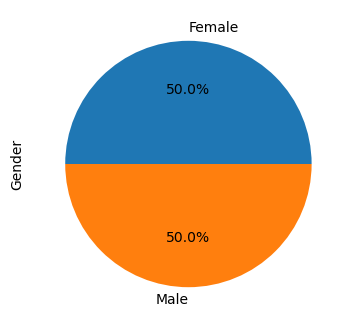

In [33]:
plt.figure(figsize=(4,4))
data['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

In [ ]:
### Age distribution : 

In [35]:
data['Age'].value_counts()

30    48
32    33
43    25
27    25
31    25
35    25
36    25
34    24
37    24
41    24
28    24
29    11
33    10
42     9
26     9
38     9
Name: Age, dtype: int64

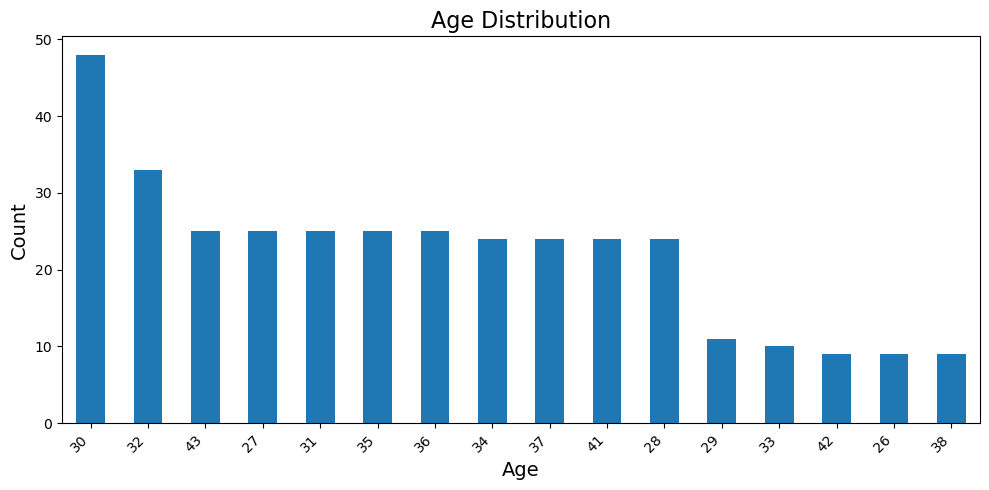

In [38]:
plt.figure(figsize=(10, 5))
data['Age'].value_counts().plot(kind='bar')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Age Distribution: Most customers are between 25–40 years old, indicating a young and active customer base.  

In [7]:
data.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

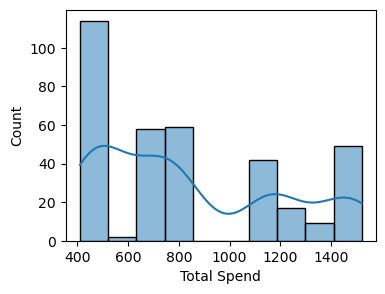

In [14]:
plt.figure(figsize=(4,3))
sns.histplot(data['Total Spend'],kde=True)
plt.show()

Slightly right-skewed majority are moderate spenders, with fewer high-value customers.

In [42]:
data['Membership Type'].value_counts()

Gold      117
Silver    117
Bronze    116
Name: Membership Type, dtype: int64

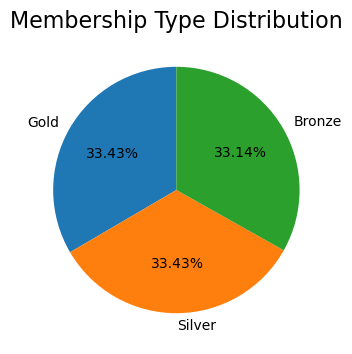

In [47]:
plt.figure(figsize=(4, 4))
data['Membership Type'].value_counts().plot(kind='pie', autopct='%1.2f%%', startangle=90)
plt.title('Membership Type Distribution', fontsize=16)
plt.ylabel('')
plt.show()

In [48]:
data['City'].value_counts()

New York         59
Los Angeles      59
Chicago          58
San Francisco    58
Miami            58
Houston          58
Name: City, dtype: int64

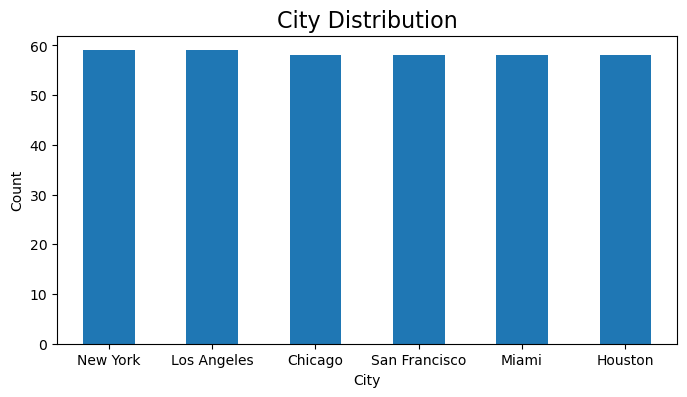

In [55]:
plt.figure(figsize=(8,4))
data['City'].value_counts().plot(kind='bar')
plt.title('City Distribution', fontsize=16)
plt.ylabel('Count')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.show()

In [56]:
data['Satisfaction Level'].value_counts()

Satisfied      127
Unsatisfied    116
Neutral        107
Name: Satisfaction Level, dtype: int64

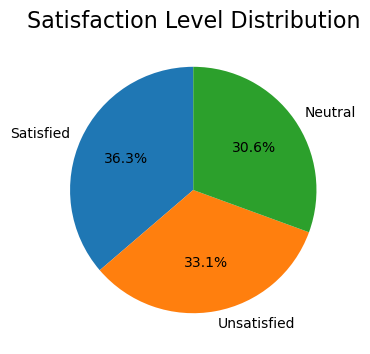

In [60]:
plt.figure(figsize=(5,4))
data['Satisfaction Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Satisfaction Level Distribution', fontsize=16)
plt.ylabel('') 
plt.show()

In [28]:
data['Gender'].value_counts()

Female    175
Male      175
Name: Gender, dtype: int64

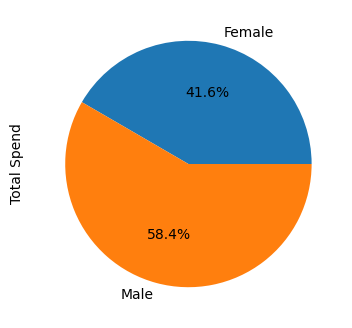

In [70]:
plt.figure(figsize=(4,4))
data.groupby('Gender')['Total Spend'].sum().plot(kind='pie',autopct='%1.1f%%')
plt.show()

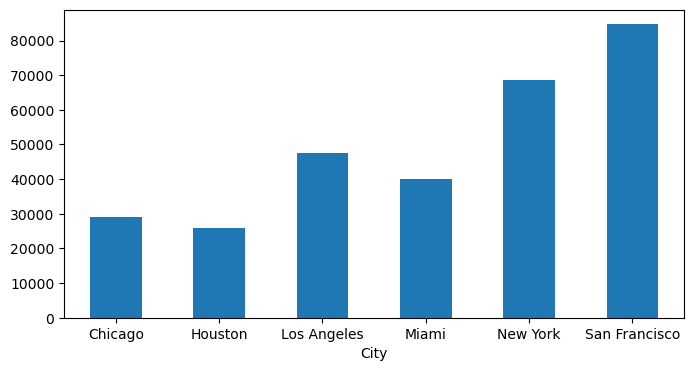

In [73]:
plt.figure(figsize=(8,4))
data.groupby('City')['Total Spend'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

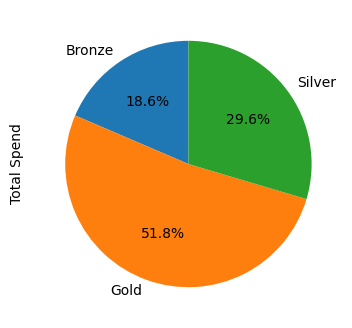

In [25]:
plt.figure(figsize=(8,4))
data.groupby('Membership Type')['Total Spend'].sum().plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.xticks(rotation=0)
plt.show()

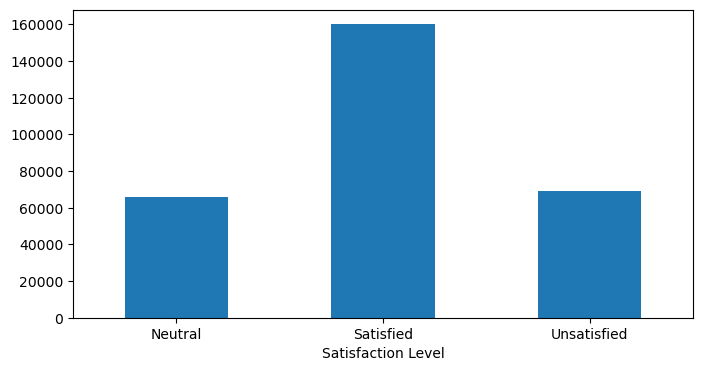

In [6]:
plt.figure(figsize=(8,4))
data.groupby('Satisfaction Level')['Total Spend'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

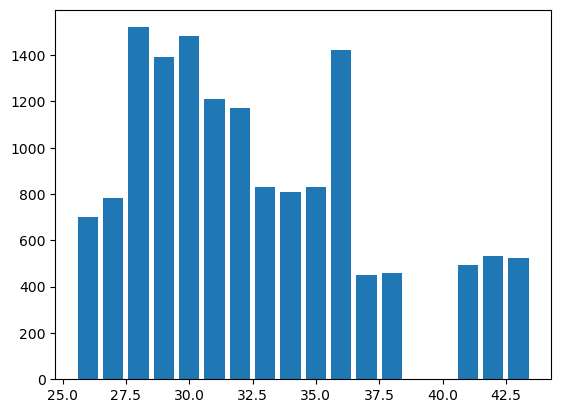

In [16]:
plt.bar(data['Age'],data['Total Spend'])
plt.show()

Younger customers (20–35) have higher spending scores, suggesting strong engagement from the dataset.  

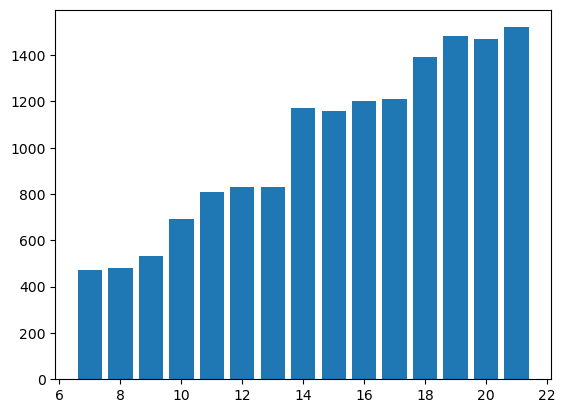

In [23]:
plt.bar(data['Items Purchased'],data['Total Spend'])
plt.show()

In [19]:
data['Items Purchased'].value_counts()

10    47
9     34
8     33
12    33
13    32
11    28
7     25
15    24
21    24
16    24
20    19
14    11
18     9
19     6
17     1
Name: Items Purchased, dtype: int64

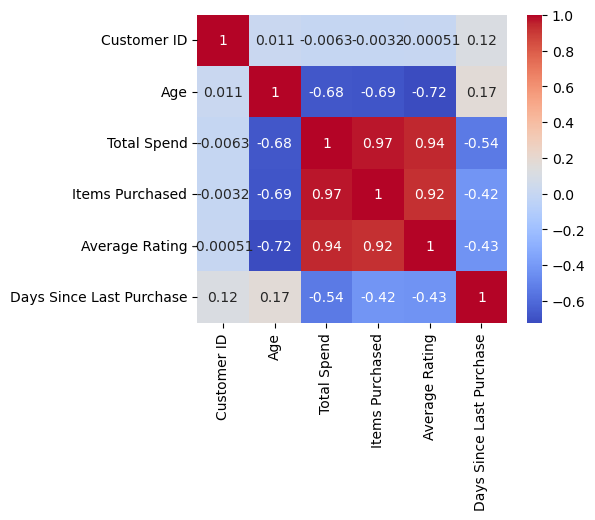

In [24]:
numerical_cols = data.select_dtypes(include=['number']).columns
correlation_matrix=data[numerical_cols].corr()
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

Correlation Insights : 
Strong correlations between Spending Score, and Purchase Frequency,Avg Rating these were chosen as key clustering features and Weak correlation with Age.  

In [29]:
data.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [110]:
data=pd.read_csv('E-commerce Customer Behavior - Sheet1.csv')
data

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [115]:
data['Discount Applied'].unique()

array([ True, False])

In [116]:
data['Discount Applied'] = data['Discount Applied'].astype(int)

In [117]:
data['Discount Applied'].unique()

array([1, 0])

In [118]:
data['Satisfaction Level'] = data['Satisfaction Level'].map({'Unsatisfied': 0, 'Neutral': 1, 'Satisfied': 2})

In [119]:
data['Satisfaction Level'].unique()

array([2, 1, 0], dtype=int64)

In [127]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
data['Membership Type'] = label_encoder.fit_transform(data['Membership Type'])
data

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,0,29,4,1,1120.20,14,4.6,1,25,2
1,102,1,34,2,2,780.50,11,4.1,0,18,1
2,103,0,43,0,0,510.75,9,3.4,1,42,0
3,104,1,30,5,1,1480.30,19,4.7,0,12,2
4,105,1,27,3,2,720.40,13,4.0,1,55,0
...,...,...,...,...,...,...,...,...,...,...,...
345,446,1,32,3,2,660.30,10,3.8,1,42,0
346,447,0,36,1,0,470.50,8,3.0,0,27,1
347,448,0,30,4,1,1190.80,16,4.5,1,28,2
348,449,1,34,2,2,780.20,11,4.2,0,21,1


In [124]:
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [125]:
data['City'] = label_encoder.fit_transform(data['City'])

In [104]:
data

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,0,29,4,1,1120.20,14,4.6,1,25,2.0
1,1,34,2,2,780.50,11,4.1,0,18,1.0
2,0,43,0,0,510.75,9,3.4,1,42,0.0
3,1,30,5,1,1480.30,19,4.7,0,12,2.0
4,1,27,3,2,720.40,13,4.0,1,55,0.0
...,...,...,...,...,...,...,...,...,...,...
345,1,32,3,2,660.30,10,3.8,1,42,0.0
346,0,36,1,0,470.50,8,3.0,0,27,1.0
347,0,30,4,1,1190.80,16,4.5,1,28,2.0
348,1,34,2,2,780.20,11,4.2,0,21,1.0


In [128]:
features = ['Age', 'Total Spend', 'Items Purchased', 
            'Average Rating', 'Discount Applied', 
            'Days Since Last Purchase', 'Satisfaction Level']
X = data[features]

In [129]:
X.isnull().sum()

Age                         0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [131]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [132]:
X_scaled

array([[-0.94515206,  0.76013014,  0.3373459 , ...,  1.        ,
        -0.11835933,  1.16324634],
       [ 0.08282563, -0.17945875, -0.38553817, ..., -1.        ,
        -0.63990676, -0.03774546],
       [ 1.93318547, -0.92557033, -0.86746089, ...,  1.        ,
         1.14825585, -1.23873725],
       ...,
       [-0.73955652,  0.95540531,  0.81926861, ...,  1.        ,
         0.10516099,  1.16324634],
       [ 0.08282563, -0.18028853, -0.38553817, ..., -1.        ,
        -0.41638644, -0.03774546],
       [ 1.93318547, -0.91174064, -0.62649953, ...,  1.        ,
         1.66980327, -1.23873725]])

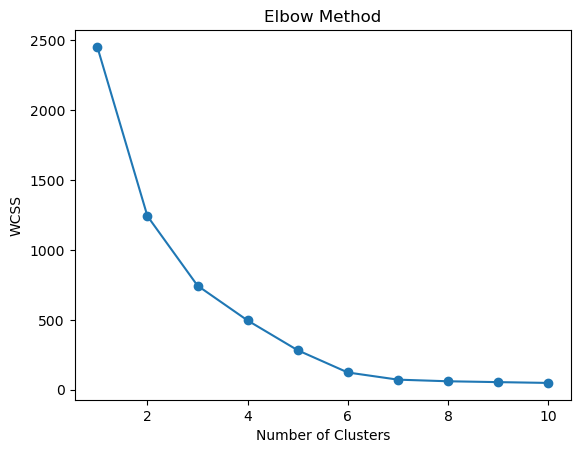

In [133]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [135]:
kmeans = KMeans(n_clusters=4, random_state=42)
X['Cluster'] = kmeans.fit_predict(X_scaled)

In [136]:
cluster_summary = X.groupby('Cluster')[features].mean().round(2)
print(cluster_summary)

           Age  Total Spend  Items Purchased  Average Rating  \
Cluster                                                        
0        28.95       690.39            11.64            3.93   
1        35.40       627.73             9.64            3.69   
2        29.92      1311.14            17.62            4.68   
3        42.02       499.88             9.41            3.46   

         Discount Applied  Days Since Last Purchase  Satisfaction Level  
Cluster                                                                  
0                     1.0                     45.50                0.00  
1                     0.0                     18.98                1.09  
2                     0.5                     17.94                2.00  
3                     1.0                     40.47                0.00  


In [151]:
X.groupby('Cluster').mean()

,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
Cluster,,,,,,,
0,28.948276,690.389655,11.637931,3.927586,1.000000,45.500000,0.00000
1,35.401709,627.725641,9.641026,3.687179,0.000000,18.982906,1.08547
2,29.923077,1311.144444,17.615385,4.675214,0.504274,17.940171,2.00000
3,42.017241,499.882759,9.413793,3.456897,1.000000,40.465517,0.00000


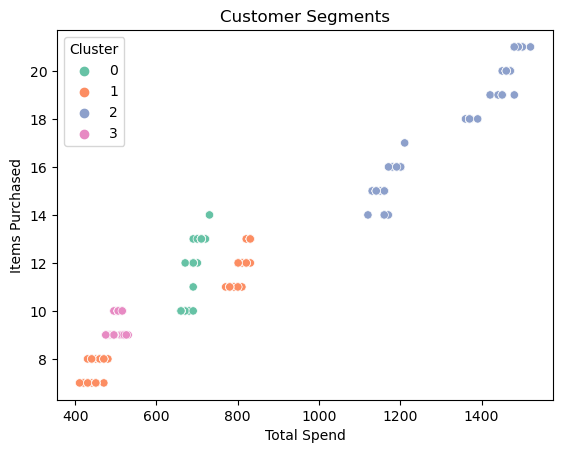

In [137]:
import seaborn as sns

sns.scatterplot(data=X, x='Total Spend', y='Items Purchased', hue='Cluster', palette='Set2')
plt.title('Customer Segments')
plt.show()


Interpret the Clusters

After reviewing cluster_summary, interpret them as:  
Cluster 0: High spenders, frequent buyers — Loyal / Premium Customers
Cluster 1: Low spend, high inactivity — At-Risk Customers
Cluster 2: Moderate spenders using discounts — Discount Seekers
Cluster 3: New or occasional buyers —  New Users

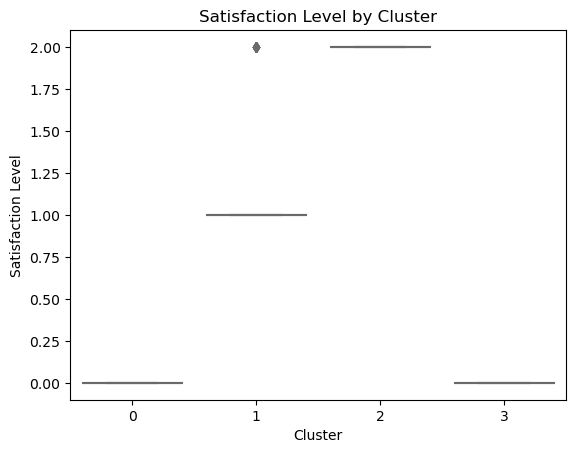

In [149]:
sns.boxplot(data=X, x='Cluster', y='Satisfaction Level', palette='Set3')
plt.title('Satisfaction Level by Cluster')
plt.show()

#### Use Cases:

Customer Segmentation :  
Analyze and categorize customers based on demographics, spending habits, and satisfaction levels.  
Satisfaction Analysis:  
Investigate factors influencing customer satisfaction and identify areas for improvement.   

Promotion Strategy:  
Assess the impact of discounts on customer spending and tailor promotional strategies accordingly.

Retention Strategies:  
Develop targeted retention strategies by understanding the time gap since the last purchase. 

City-based Insights:  
Explore regional variations in customer behavior to optimize marketing efforts based on location-specific trends.  

### Conclusion : 
The K-Means model successfully segmented the customer base into four meaningful groups,
providing actionable insights for marketing and growth strategies.  
